# Data Storytelling

The ultimate goal of this project is to develop a model that can predict whether a player will be an allstar the following year based on the previous season's  performance. Before I can build this model, I need to look through the data. I begin by importing the necessary packages.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import seaborn as sns

from cleaning import df

Since I am trying to predict whether a player is an all star or not in the following year, I want to see how many `allstar_next` = 1 instances are in my dataset.

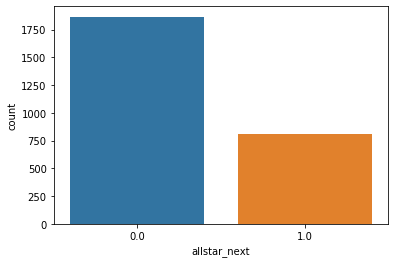

Allstars: 807.0
Non All Stars: 1865.0


In [2]:
_ = sns.countplot(x='allstar_next', data=df)
_ = plt.show()
print('Allstars: {}'.format(sum(df.allstar_next)))
print('Non All Stars: {}'.format(len(df) - sum(df.allstar_next)))

There are a little over 2x more non-allstars as allstars in my dataset meaning that I have an unbalanced dataset. I will need to keep this in mind when I am testing my models and measuring their accuracy.

Next I want to take a look at each individual categories basic statistics in order to better understand my dataset. I broke it up so that I can see every column.

In [3]:
df.describe().iloc[:, :10]

,height,age,g,gs,mp,fg,fga,fgp,threep,threepa
count,2672.000000,2672.000000,2672.000000,2672.000000,2672.000000,2672.000000,2672.000000,2672.000000,2672.000000,2672.000000
mean,78.590195,27.992515,67.799401,53.276198,30.516804,5.642777,11.960554,0.469942,0.763211,2.139633
std,3.848899,4.801092,17.244823,29.101445,7.611896,2.437118,4.941186,0.057742,0.817456,2.130509
min,69.000000,18.000000,1.000000,0.000000,3.800000,0.200000,1.000000,0.200000,0.000000,0.000000
25%,75.000000,24.000000,62.000000,27.000000,26.275000,3.700000,8.100000,0.433000,0.000000,0.100000
50%,79.000000,28.000000,75.000000,66.000000,32.700000,5.600000,12.000000,0.466000,0.500000,1.600000
75%,82.000000,31.250000,80.000000,78.000000,36.200000,7.400000,15.700000,0.503000,1.300000,3.700000
max,90.000000,43.000000,83.000000,82.000000,43.700000,13.400000,27.800000,1.000000,5.100000,13.200000


In [4]:
df.describe().iloc[:, 10:20]

,threepp,twop,twopa,twopp,efgp,ft,fta,ftp,orb,drb
count,2672.000000,2672.000000,2672.000000,2672.000000,2672.000000,2672.000000,2672.000000,2672.000000,2672.000000,2672.000000
mean,0.266567,4.880314,9.820097,0.492150,0.503116,3.130913,4.049738,0.769700,1.470734,4.076010
std,0.156231,2.462204,4.751075,0.053712,0.049559,1.879092,2.377989,0.101961,1.110626,2.210918
min,0.000000,0.100000,0.500000,0.179000,0.233000,0.000000,0.100000,0.000000,0.000000,0.000000
25%,0.182000,2.900000,6.000000,0.460000,0.474000,1.600000,2.200000,0.724000,0.600000,2.400000
50%,0.319000,4.700000,9.500000,0.490000,0.502000,2.900000,3.700000,0.786000,1.100000,3.500000
75%,0.371000,6.700000,13.400000,0.521000,0.531000,4.300000,5.500000,0.839250,2.200000,5.525000
max,1.000000,13.200000,27.000000,1.000000,1.000000,10.300000,13.100000,1.000000,6.900000,12.300000


In [5]:
df.describe().iloc[:, 20:]

,trb,ast,stl,blk,tov,pf,pts,allstar,years_in_league,allstar_next
count,2672.000000,2672.000000,2672.000000,2672.000000,2672.000000,2672.000000,2672.000000,2672.000000,2672.000000,2672.000000
mean,5.545621,3.642028,1.090382,0.674663,2.074813,2.341055,15.177133,0.314371,7.811377,0.302021
std,3.145913,2.473030,0.555158,0.710307,0.881342,0.700181,6.638070,0.464352,4.544095,0.459220
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.600000,0.000000,1.000000,0.000000
25%,3.100000,1.800000,0.700000,0.200000,1.400000,1.800000,10.000000,0.000000,4.000000,0.000000
50%,4.700000,3.000000,1.000000,0.400000,2.000000,2.300000,15.000000,0.000000,7.000000,0.000000
75%,7.600000,4.900000,1.400000,0.900000,2.700000,2.800000,19.900000,1.000000,11.000000,1.000000
max,18.700000,14.500000,3.700000,4.600000,5.700000,4.500000,37.100000,1.000000,21.000000,1.000000


I want to get an understanding of the distributions for each variable.

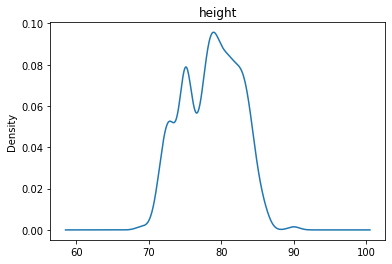

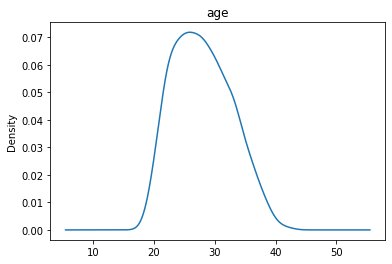

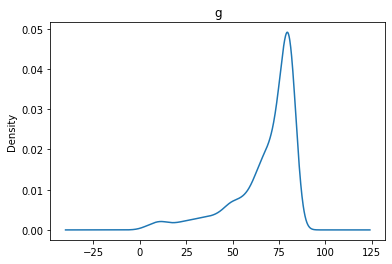

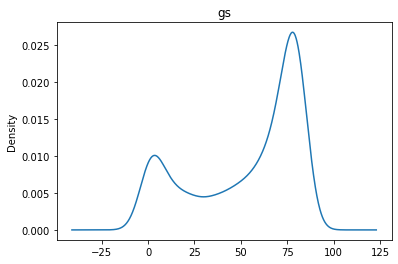

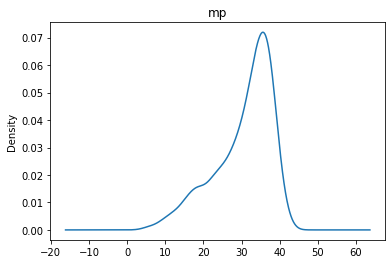

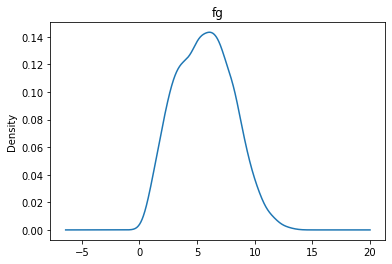

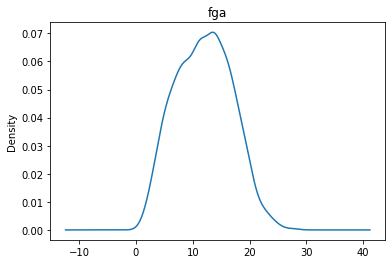

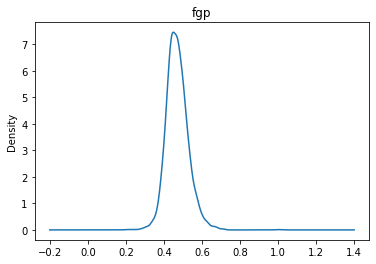

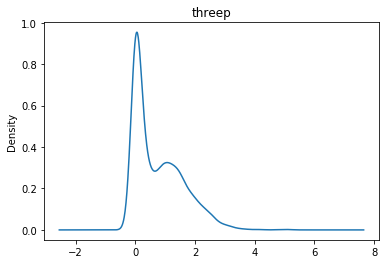

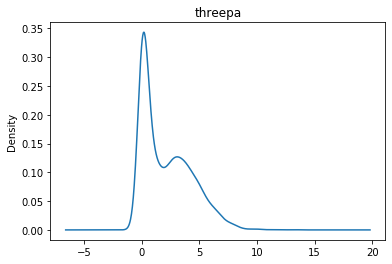

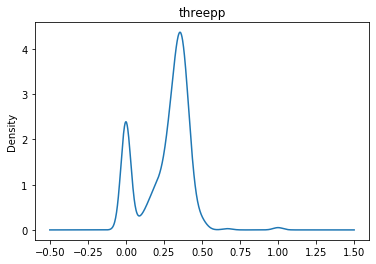

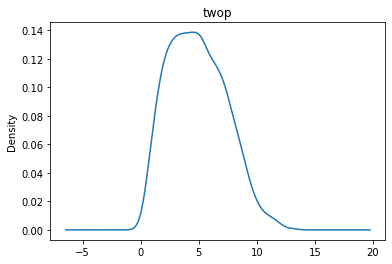

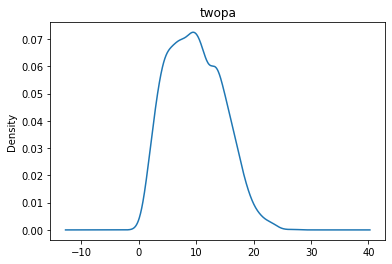

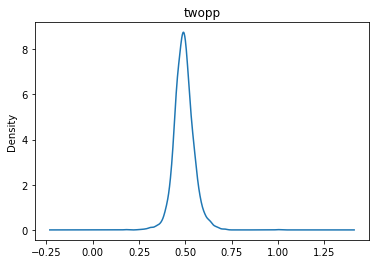

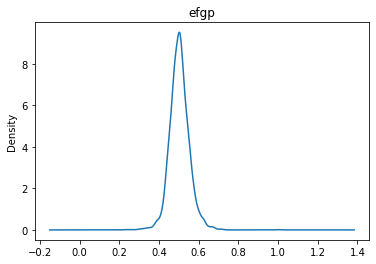

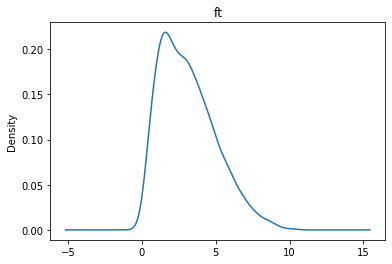

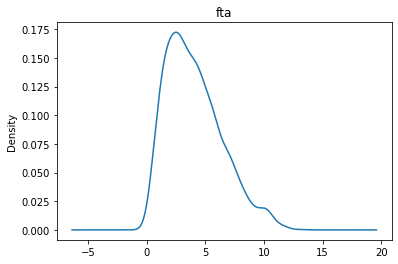

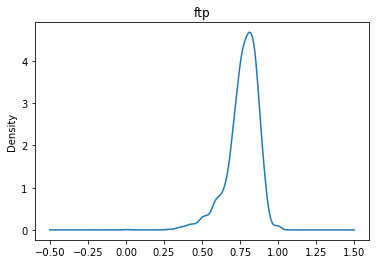

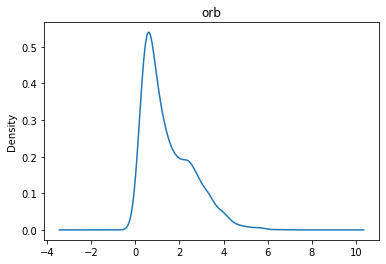

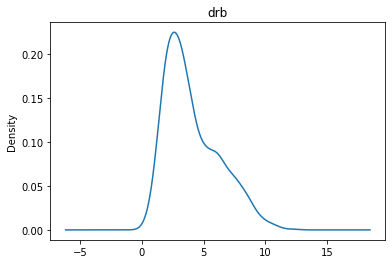

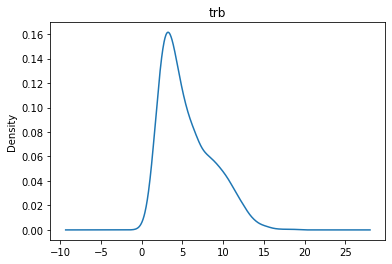

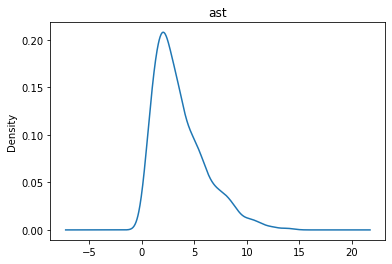

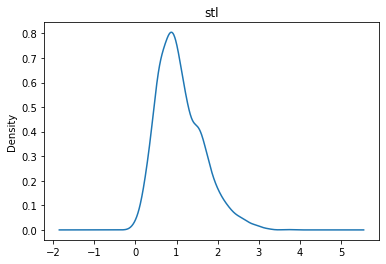

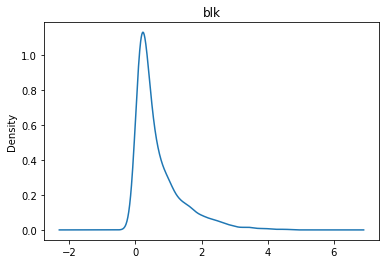

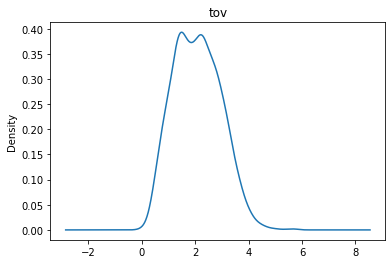

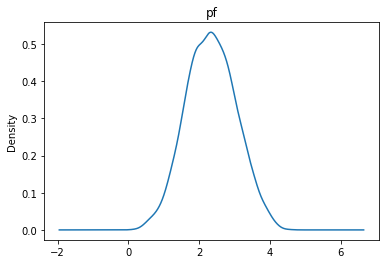

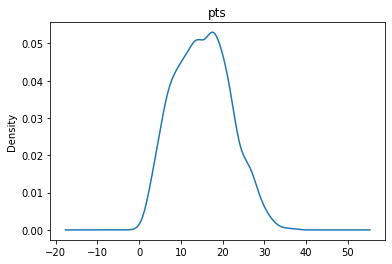

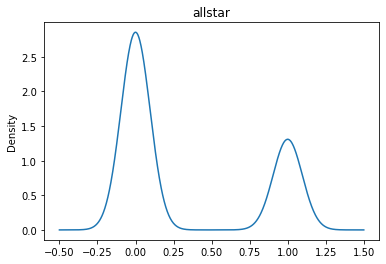

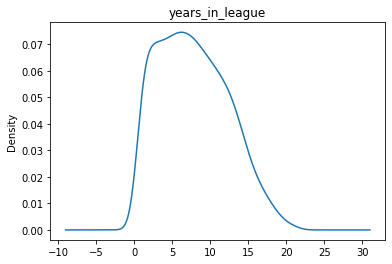

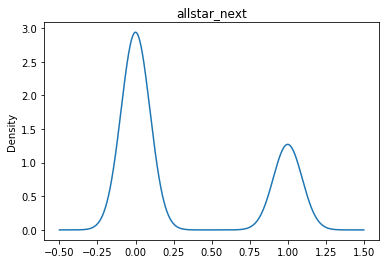

In [6]:
for col in df:
    if np.dtype(df[col]) != 'object':
        _ = plt.figure()
        _ = df[col].plot(kind='kde')
        _ = plt.title(col)
        _ = plt.show()

## Categories approximately normal:
- `age`
- `fg`
- `fga`
- `fgp` but extreme values makes it very skinny
- `twop`
- `twopa`
- `twopp`
- `efgp`
- `tov`
- `pf`
- `pts`

## Skewed categories:
- `g` (left)
- `mp` (left)
- `threep` (right) due to overwhelming amount of 0's
- `threepa` (right) but large amount of 0's
- `ft` (right)
- `fta` (right)
- `ftp` (left)
- `orb` (right)
- `drb` (right)
- `trb` (right)
- `ast` (right)
- `stl` (right)
- `blk` (right)

## Bivariate:
- `allstar`
- `allstar_next`

## Other:
- `gs` (peak at 0, max by 80)
- `threepp`

I want to see what sort of relationships can be found by drawing scatter plots of different variables over time. In order to do so, I will create line graphs of the mean value of each stat for each year in the league.

I want to make some scatter plots to get a better idea of how different stats relate to each other as well as in predicting a player's allstar status.

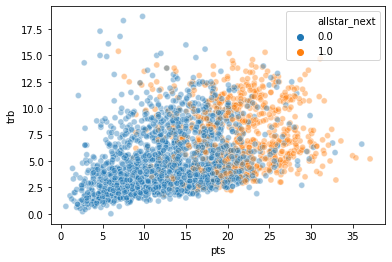

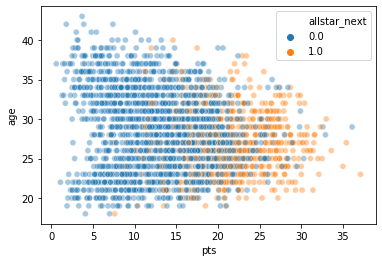

In [7]:
_ = plt.figure()
_ = sns.scatterplot(x='pts', y='trb', hue='allstar_next', data=df, alpha=0.4)
_ = plt.figure()
_ = sns.scatterplot(x='pts', y='age', hue='allstar_next', data=df, alpha=0.4)

As the above graphs show, there appears to be a somewhat discernible line of demarcation between players that are allstars the following years and those that are not. Perhaps by investigating these relationships further, I will be able to tell what 

Next I want to visualize the proportion of players that are allstars at each age.

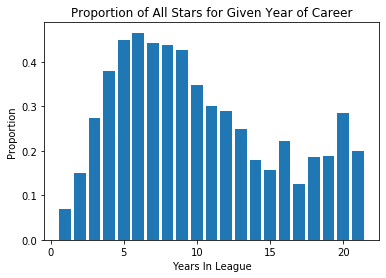

In [8]:
years = np.arange(1, 22)
astar_prop = np.empty(len(years))
for i, year in enumerate(years):
    astar_prop[i] = df[df.years_in_league == year].allstar.mean()
_ = plt.bar(x=years, height=astar_prop)
_ = plt.title('Proportion of All Stars for Given Year of Career')
_ = plt.xlabel('Years In League')
_ = plt.ylabel('Proportion')

Looking at this bar graph, the highest proportion of allstars was found in the 6th year. The stretch from year 5 to year 9 had the highest rates over a prolonged period. The peaks at the higher year totals can be explained by the fact that only very good players can manage to stay in the league for 15+ years, and since we are already dealing with the absolute best players, their exceptional careers earn them some allstar bids.

I want to see how players perform over time by looking at the mean `pts`, `trb`, and `ast` for each year of an NBA player's career.

In [9]:
fg = np.empty(len(years))
trb = np.empty(len(years))
ast = np.empty(len(years))
tov = np.empty(len(years))
for i, year in enumerate(years):
    fg[i] = df[df.years_in_league == year].fg.mean()
    trb[i] = df[df.years_in_league == year].trb.mean()
    ast[i] = df[df.years_in_league == year].ast.mean()
    tov[i] = df[df.years_in_league == year].tov.mean()

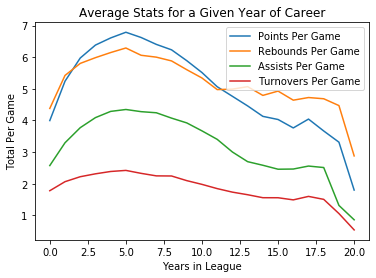

In [10]:
_ = plt.plot(fg, label='Points Per Game')
_ = plt.plot(trb, label='Rebounds Per Game')
_ = plt.plot(ast, label='Assists Per Game')
_ = plt.plot(tov, label='Turnovers Per Game')
_ = plt.title('Average Stats for a Given Year of Career')
_ = plt.xlabel('Years in League')
_ = plt.ylabel('Total Per Game')
_ = plt.legend()

These graphs convey the standard career arc which aligns with the histogram of allstar proportions at different years. There is an increase in performance in the early years until a peak is hit around year 5-6 that is followed by a slow decline. Again we see the same sort of small uptick in years 17-19 before the final decline in year 20.

Below I take a look at what the distributions of `trb` (total rebounds) look like in players who are allstars the following year and those that are not. There is a definite shift higher in allstar players, so this could end up being a variable that has high prediction capability in my final model.

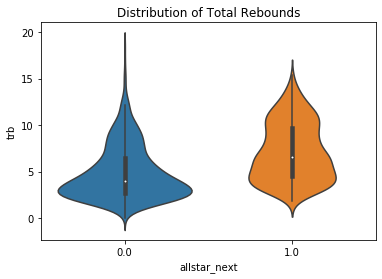

In [11]:
_ = plt.figure()
_ = sns.violinplot('allstar_next', 'trb', data=df)
_ = plt.title('Distribution of Total Rebounds')


I come away from this exercise with a greater understanding of what I want to look for in my exploratory data analysis. There are definitely categories that correlate with the `allstar_next`, and with further exploration, I may be able to tease out what those are. Additionally, I believe I will have issues with colinearity in my model development. 
